<a href="https://colab.research.google.com/github/InqM/BuildWeek1/blob/master/Michael_Kolek_Unit_1_Buildweek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/InqM/BuildWeek1/master/TI4_Game_Log.csv")

print(df.shape)
print(df.isnull().sum())
print(df.info())

df.head()

(5006, 21)
Timestamp              0
Player Count           0
Playtime (Hours)     162
Winning Race           0
Winner Exp Level     112
Winner VP              0
2nd Race               0
2nd Exp Level        117
2nd Race VP            0
3rd Race               0
3rd Exp Level        120
3rd Race VP            0
4th Race             906
4th Exp Level        988
4th Race VP          918
5th Race            2418
5th Exp Level       2470
5th Race VP         2422
6th Race            3519
6th Exp Level       3535
6th Race VP         3524
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006 entries, 0 to 5005
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         5006 non-null   object 
 1   Player Count      5006 non-null   int64  
 2   Playtime (Hours)  4844 non-null   object 
 3   Winning Race      5006 non-null   object 
 4   Winner Exp Level  4894 non-null   object 
 5   Winner VP 

,Timestamp,Player Count,Playtime (Hours),Winning Race,Winner Exp Level,Winner VP,2nd Race,2nd Exp Level,2nd Race VP,3rd Race,3rd Exp Level,3rd Race VP,4th Race,4th Exp Level,4th Race VP,5th Race,5th Exp Level,5th Race VP,6th Race,6th Exp Level,6th Race VP
0,12/29/2017 19:16:05,3,6,L1Z1X Mindnet,Beginner,10,Mentak Coalition,Beginner,9,Barony of Letnev,Beginner,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/19/2017 8:17:20,6,NaN,Federation of Sol,NaN,11,Yin Brotherhood,NaN,8,Emirates of Hacan,NaN,7,Ghosts of Creuss,NaN,7.0,Arborec,NaN,5.0,Barony of Letnev,NaN,5.0
2,11/26/2017 8:18:26,5,NaN,Universities of Jol-Nar,NaN,10,Federation of Sol,NaN,9,Arborec,NaN,7,L1Z1X Mindnet,NaN,6.0,Xxcha Kingdom,NaN,5.0,NaN,NaN,NaN
3,12/3/2017 8:19:36,5,NaN,Universities of Jol-Nar,NaN,10,Mentak Coalition,NaN,8,Yssaril Tribes,NaN,6,Yin Brotherhood,NaN,5.0,Naalu Collective,NaN,4.0,NaN,NaN,NaN
4,12/3/2017 8:23:57,6,NaN,Federation of Sol,NaN,11,Naalu Collective,NaN,8,L1Z1X Mindnet,NaN,7,Nekro Virus,NaN,7.0,Ghosts of Creuss,NaN,7.0,Winnu,NaN,6.0


In [12]:
df['Playtime (Hours)'] = df['Playtime (Hours)'].replace('12+','12.5')
df['Playtime (Hours)'] = df['Playtime (Hours)'].astype(float)

not_too_long = df['Winner VP'] <= 12
not_too_short = df['Winner VP'] >= 10

df = df[not_too_long]
df = df[not_too_short]

## Playtime Based on Player Count

In [3]:
hours_per_player = pd.crosstab(df['Player Count'],df['Playtime (Hours)'])
hours_per_player['mean'] = 0

for col in hours_per_player.columns:
  if col is not 'mean':
    hours_per_player['mean'] = hours_per_player['mean'] + (hours_per_player[col]*float(col))

hpp = hours_per_player['mean']/df['Player Count'].value_counts()
hpp

3    5.370245
4    6.770992
5    7.525126
6    8.297619
dtype: float64

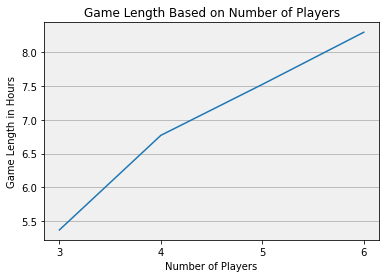

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.plot(hpp.index, hpp)

plt.locator_params(axis = 'x', nbins=4)
plt.locator_params(axis = 'y', nbins=8)


ax.set_facecolor('#F0F0F0')
plt.grid(axis = 'y')

ax.set_title('Game Length Based on Number of Players')
ax.set_xlabel('Number of Players')
ax.set_ylabel('Game Length in Hours')
plt.show()

## Playtime Based on Experience Levels

In [5]:
df['Number of Beginners'] = 0
df['Number of Intermediate'] = 0
df['Number of Advanced'] = 0

col = 4
while col < 20:
  df.iloc[:, col] = df.iloc[:, col].fillna('')
  condition = df.iloc[:, col] == 'Beginner'
  df['Number of Beginners'][condition] = df['Number of Beginners'] + 1
  condition = df.iloc[:, col] == 'Intermediate'
  df['Number of Intermediate'][condition] = df['Number of Intermediate'] + 1
  condition = df.iloc[:, col] == 'Advanced'
  df['Number of Advanced'][condition] = df['Number of Advanced'] + 1
  col = col + 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [6]:
df['exp_color'] = (df['Number of Advanced'] - df['Number of Beginners'])/df['Player Count'] + df['Player Count']*10 + 1
condition = df['Number of Beginners'] + df['Number of Intermediate'] + df['Number of Advanced'] != df['Player Count']
df['exp_color'][condition] = 'NaN'

color_df = pd.crosstab(df['exp_color'],df['Playtime (Hours)'])
color_df['mean'] = 0

for col in color_df.columns:
  if col is not 'mean':
    color_df['mean'] = color_df['mean'] + (color_df[col]*float(col))

color_df['mean'] = color_df['mean']/df['exp_color'].value_counts()
color_df['player count'] = color_df.index

color_df.dropna
color_df.drop(color_df.tail(1).index,inplace=True)

color_df['red'] = color_df['player count'].astype(float)%10-1
color_df['green'] = color_df['red']*-1
more_advanced = color_df['red'] >= 0
less_advanced = color_df['green'] >= 0
color_df['red'][more_advanced] = 0
color_df['green'][less_advanced] = 0
color_df['red'] = color_df['red'] + 1
color_df['green'] = color_df['green'] + 1
color_df['blue'] = 0

final_color = color_df[['red','green','blue']].to_numpy()

color_df['player count'] = (color_df['player count']/10).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


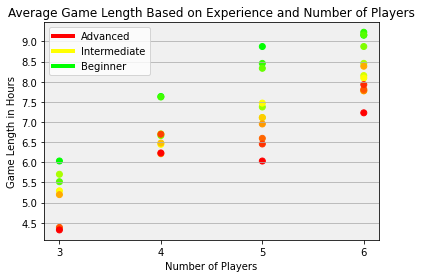

In [10]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

scatter = ax.scatter(color_df['player count'], color_df['mean'], marker='o', c = final_color)
plt.locator_params(axis = 'x', nbins=4)
plt.locator_params(axis = 'y', nbins=12)

ax.set_facecolor('#F0F0F0')
plt.grid(axis = 'y')

ax.set_title('Average Game Length Based on Experience and Number of Players')
ax.set_xlabel('Number of Players')
ax.set_ylabel('Game Length in Hours')

legend_entries = [Line2D([0], [0], color=[1,0,0], lw=4, label='Advanced'),
                  Line2D([0], [0], color=[1,1,0], lw=4, label='Intermediate'),
                  Line2D([0], [0], color=[0,1,0], lw=4, label='Beginner')]
ax.legend(handles=legend_entries)

plt.show()

In [8]:
pd.crosstab(df['Winning Race'], df['Winner Exp Level'])

print(df['Winner Exp Level'].value_counts())
print(df['Number of Beginners'].value_counts())
print(df['Number of Intermediate'].value_counts())
print(df['Number of Advanced'].value_counts())

Intermediate    1740
Beginner        1481
Advanced        1059
                 105
Name: Winner Exp Level, dtype: int64
0    1064
1     873
2     787
3     690
4     509
5     285
6     177
Name: Number of Beginners, dtype: int64
0    1447
1     873
2     724
3     656
4     422
5     172
6      91
Name: Number of Intermediate, dtype: int64
0    2850
1     548
2     419
3     305
4     173
5      57
6      33
Name: Number of Advanced, dtype: int64


##Extra to return to later

In [9]:
df['all_exp'] = df['Number of Beginners'].astype(str) + ' ' + df['Number of Intermediate'].astype(str) + ' ' + df['Number of Advanced'].astype(str) + ' '

condition = df['Number of Beginners'] + df['Number of Intermediate'] + df['Number of Advanced'] != df['Player Count']
df['all_exp'][condition] = 'NaN'

playtime_df = pd.crosstab(df['all_exp'],df['Playtime (Hours)'])

playtime_df['mean'] = 0

for col in playtime_df.columns:
  if col is not 'mean':
    playtime_df['mean'] = playtime_df['mean'] + (playtime_df[col]*float(col))


#Just learned .sort_index() isn't necessary because the index is the entry name and not a number.
playtime_df['mean'] = playtime_df['mean']/df['all_exp'].value_counts()
#Drops the NaN column

playtime_df['vector'] = playtime_df.index
playtime_df['vector'] = playtime_df['vector'] + playtime_df['mean'].astype(str)
playtime_df = playtime_df.dropna()

playtime_string_matrix = playtime_df['vector'].to_numpy()
playtime_matrix = np.empty((74,4))
m = 0

for i in playtime_string_matrix:
  if m != 74:
    playtime_matrix[m] = np.fromstring(i, dtype=float, sep=' ')
  m = m+1

playtime_df.drop(playtime_df.tail(1).index,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
